In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Import Mask RCNN
# sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.brixilated_lego import lego
tf.__version__

2021-10-22 23:41:00.821252: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


'2.5.0'

In [2]:
ROOT_DIR = './'
os.chdir(ROOT_DIR)

In [3]:
config = lego.LegoConfig()
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax


Configurations:
BACKBONE                       resnet101
BACKBONE_FITLERS_CONFIG        {'S2': [64, 64], 'S3': [128, 128], 'S4': [256, 256], 'S5': [512, 512]}
BACKBONE_MRCNN                 resnet18
BACKBONE_RESNET_BASIC_DEFAULT  {'S2': [64, 64], 'S3': [128, 128], 'S4': [256, 256], 'S5': [512, 512]}
BACKBONE_RESNET_BASIC_WIDER    {'S2': [160, 160], 'S3': [320, 320], 'S4': [640, 640], 'S5': [1280, 1280]}
BACKBONE_RESNET_BOTTLE_DEFAULT {'S2': [64, 64, 256], 'S3': [128, 128, 512], 'S4': [256, 256, 1024], 'S5': [512, 512, 2048]}
BACKBONE_RESNET_BOTTLE_WIDER   {'S2': [256, 256, 256], 'S3': [512, 512, 512], 'S4': [1024, 1024, 1024], 'S5': [1024, 1024, 2048]}
BACKBONE_RPN                   resnet18
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZ

In [4]:
# DATASET = "train"
# DATASET = "eval"
DATASET = "val"
LEGO_DIR = os.path.join(ROOT_DIR, "datasets", "output", "coco_data")

dataset = lego.LegoDataset()
dataset.load_coco(LEGO_DIR, DATASET)
dataset.prepare()
print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

loading annotations into memory...
Done (t=5.38s)
creating index...
index created!
Images: 3029
Classes: ['BG', '2431', '3003', '3005', '3010', '3020', '3021', '3022', '3023', '3024', '3069', '3070', '3176', '3622', '3700', '3710', '3958', '4150', '4274', '6141', '11211', '11476', '11477', '15068', '15573', '22885', '24201', '24246', '25269', '29119', '29120', '33909', '35480', '36840', '47458', '47905', '85984', '87079', '87087', '87580', '93273', '98138', '99206']


In [5]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
LEGO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "snapshots", "weights","mask_rcnn_lego_0111.h5") # Comment out to use snapshot from latest training

model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
print("Loading weights ", LEGO_WEIGHTS_PATH)
model.load_weights(LEGO_WEIGHTS_PATH, by_name=True)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Instructions for updating:
Use fn_output_signature instead


2021-10-22 23:41:11.784171: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-10-22 23:41:11.849726: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-10-22 23:41:11.849755: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-10-22 23:41:11.852626: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-10-22 23:41:11.852666: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2021-10-22 23:41:11.853359: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.

Loading weights  ./snapshots/weights/mask_rcnn_lego_0111.h5


2021-10-22 23:41:13.037308: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-22 23:41:13.039501: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-10-22 23:41:13.040621: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2021-10-22 23:41:13.040670: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-10-22 23:41:13.492315: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect Stream

### RPN Analysis

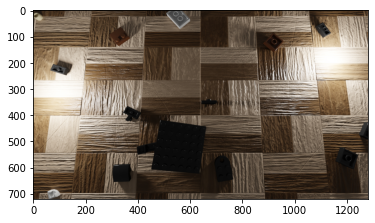

In [6]:
img = dataset.load_image(0)
plt.figure()
plt.imshow(img)

In [7]:
image_id = 0
image, image_meta, gt_class_ids, gt_bboxes, gt_masks = modellib.load_image_gt(dataset, config, image_id)#, use_mini_mask=False)

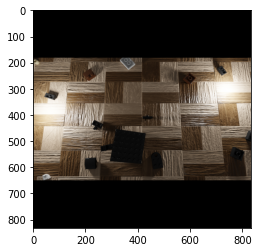

In [8]:
plt.figure()
plt.imshow(image)

In [9]:
image_ids = np.random.choice(dataset.image_ids, 1)
image_id = image_ids[0]
    
image, image_meta, gt_class_ids, gt_bboxes, gt_masks = modellib.load_image_gt(dataset, config, image_id)#, use_mini_mask=False)

In [10]:
# Run RPN sub-graph
if config.USE_RPN_ROIS:
    pillar = model.keras_model.get_layer("ROI").output

    # TF 1.4 and 1.9 introduce new versions of NMS. Search for all names to support TF 1.3~1.10
    nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression:0")
    if nms_node is None:
        nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression/NonMaxSuppressionV2:0")
    if nms_node is None: #TF 1.9-1.10
        nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression/NonMaxSuppressionV3:0")

    rpn = model.run_graph([image], [
        ("rpn_class", model.keras_model.get_layer("rpn_class").output),         # Last layer in RPN with the proposed class probabilites for background or foreground per anchor
        ("pre_nms_anchors", model.ancestor(pillar, "ROI/pre_nms_anchors:0")),
        ("refined_anchors", model.ancestor(pillar, "ROI/refined_anchors:0")),
        ("refined_anchors_clipped", model.ancestor(pillar, "ROI/refined_anchors_clipped:0")),
        ("post_nms_anchor_ix", nms_node),                                       # Filtered anchors that have a NMS of RPN_NMS_THRESHOLD (>0.7)
        ("proposals", model.keras_model.get_layer("ROI").output),               # "ROI" is the name of the ProposalLayers, the filtered rois proposals
    ])
#     ], config)

2021-10-22 23:41:45.280510: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-10-22 23:41:45.680492: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8200
2021-10-22 23:41:46.221535: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-10-22 23:41:46.715717: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


rpn_class                shape: (1, 172887, 2)        min:    0.00000  max:    1.00000  float32
pre_nms_anchors          shape: (1, 6000, 4)          min:   -0.06807  max:    1.05845  float32
refined_anchors          shape: (1, 6000, 4)          min:   -0.01164  max:    0.97648  float32
refined_anchors_clipped  shape: (1, 6000, 4)          min:    0.00000  max:    0.97648  float32
post_nms_anchor_ix       shape: (34,)                 min:    0.00000  max: 5945.00000  int32
proposals                shape: (1, 1000, 4)          min:    0.00000  max:    0.96785  float32


Best proposals are:

Proposal Bbox 0: 	[0 440 4 484] w=4 h=44 iou=0.49
Proposal Bbox 1: 	[299 462 326 504] w=27 h=43 iou=0.77
Proposal Bbox 2: 	[107 179 151 232] w=45 h=53 iou=0.87
Proposal Bbox 3: 	[287 214 335 254] w=48 h=39 iou=0.88
Proposal Bbox 4: 	[550 618 585 652] w=35 h=35 iou=0.83
Proposal Bbox 5: 	[5 635 27 650] w=22 h=15 iou=0.66
Proposal Bbox 6: 	[566 183 624 203] w=59 h=20 iou=0.78
Proposal Bbox 7: 	[774 550 805 573] w=31 h=23 iou=0.87
Proposal Bbox 8: 	[745 182 800 252] w=55 h=71 iou=0.83
Proposal Bbox 9: 	[191 434 223 451] w=32 h=17 iou=0.78
Proposal Bbox 10: 	[409 405 456 454] w=47 h=50 iou=0.86
Proposal Bbox 11: 	[105 504 174 581] w=69 h=77 iou=0.88
Proposal Bbox 12: 	[37 319 81 357] w=44 h=37 iou=0.92
Proposal Bbox 13: 	[63 215 103 243] w=41 h=28 iou=0.78
Proposal Bbox 14: 	[560 219 596 261] w=37 h=43 iou=0.77
Proposal Bbox 15: 	[220 267 270 313] w=50 h=46 iou=0.92
Proposal Bbox 16: 	[106 627 168 654] w=62 h=27 iou=0.78

Average maximum IoU is: 0.80


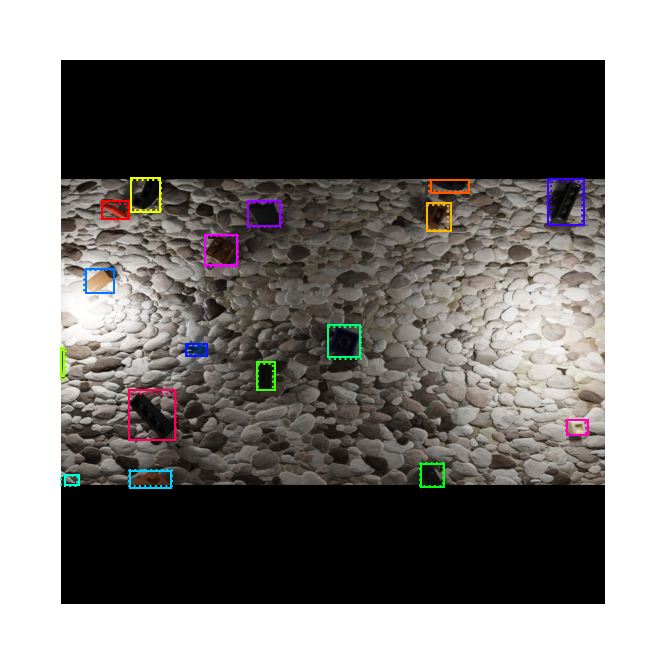

In [11]:
# Find the proposal that has the highest IoU on each GT box and take average of all
max_proposals_bbox = np.empty((gt_bboxes.shape[0], 4))
max_proposals_iou = np.empty((gt_bboxes.shape[0], 1))

# Get proposals from graph
h, w = config.IMAGE_SHAPE[:2]
proposals = rpn['proposals'][0, :] * np.array([h, w, h, w])

print("Best proposals are:\n")
for i, box in enumerate(gt_bboxes):

    overlaps = utils.compute_overlaps(np.array([box.tolist()]), proposals)
    iou_max = np.max(overlaps, axis=1)
    iou_argmax = np.argmax(overlaps, axis=1)
    max_proposals_bbox[i] = proposals[iou_argmax]
    max_proposals_iou[i] = iou_max

    y1, x1, y2, x2 = proposals[iou_argmax][0]
    iou = iou_max[0]

    print("Proposal Bbox {}: \t[{:.0f} {:.0f} {:.0f} {:.0f}] w={:.0f} h={:.0f} iou={:.2f}".format(i, x1, y1, x2, y2, x2-x1, y2-y1, iou))


print("\nAverage maximum IoU is: {0:0.2f}".format(np.average(max_proposals_iou)))
visualize.draw_boxes(image, boxes=gt_bboxes, refined_boxes=max_proposals_bbox)

# Run Evaluation

In [12]:
# Pulled snippet for calculating TP, FP, FN https://github.com/matterport/Mask_RCNN/issues/2408
def get_iou(a, b, epsilon=1e-5, intersection_check=False):
    x1 = max(a[0], b[0])
    y1 = max(a[1], b[1])
    x2 = min(a[2], b[2])
    y2 = min(a[3], b[3])

    width = (x2 - x1)
    height = (y2 - y1)

    if (width < 0) or (height < 0):
        if intersection_check:
            return 0.0, False
        else:
            return 0.0
    area_overlap = width * height

    area_a = (a[2] - a[0]) * (a[3] - a[1])
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    area_combined = area_a + area_b - area_overlap

    iou = area_overlap / (area_combined + epsilon)
    if intersection_check:
        return iou, bool(area_overlap)
    else:
        return iou


def calc_conditions(gt_boxes, pred_boxes, iou_thresh=0.5, hard_fp=True):
    gt_class_ids_ = np.zeros(len(gt_boxes))
    pred_class_ids_ = np.zeros(len(pred_boxes))

    tp, fp, fn = 0, 0, 0
    for i in range(len(gt_class_ids_)):
        iou = []
        for j in range(len(pred_class_ids_)):
            now_iou, intersect = get_iou(gt_boxes[i], pred_boxes[j], intersection_check=True)
            if now_iou >= iou_thresh and intersect:
                iou.append(now_iou)
                gt_class_ids_[i] = 1
                pred_class_ids_[j] = 1
        if len(iou) > 0:
            tp += 1   # TP
            fp += len(iou) - 1   # FP
    fn += np.count_nonzero(np.array(gt_class_ids_) == 0)
    fp += np.count_nonzero(np.array(pred_class_ids_) == 0)

    return tp, fp, fn

/home/panda/.conda/envs/lego/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


TP: 74, FP: 0, TP/FP: 0, TP/Total: 84.0909090909091
mAP@0.2:  0.8285087792078654


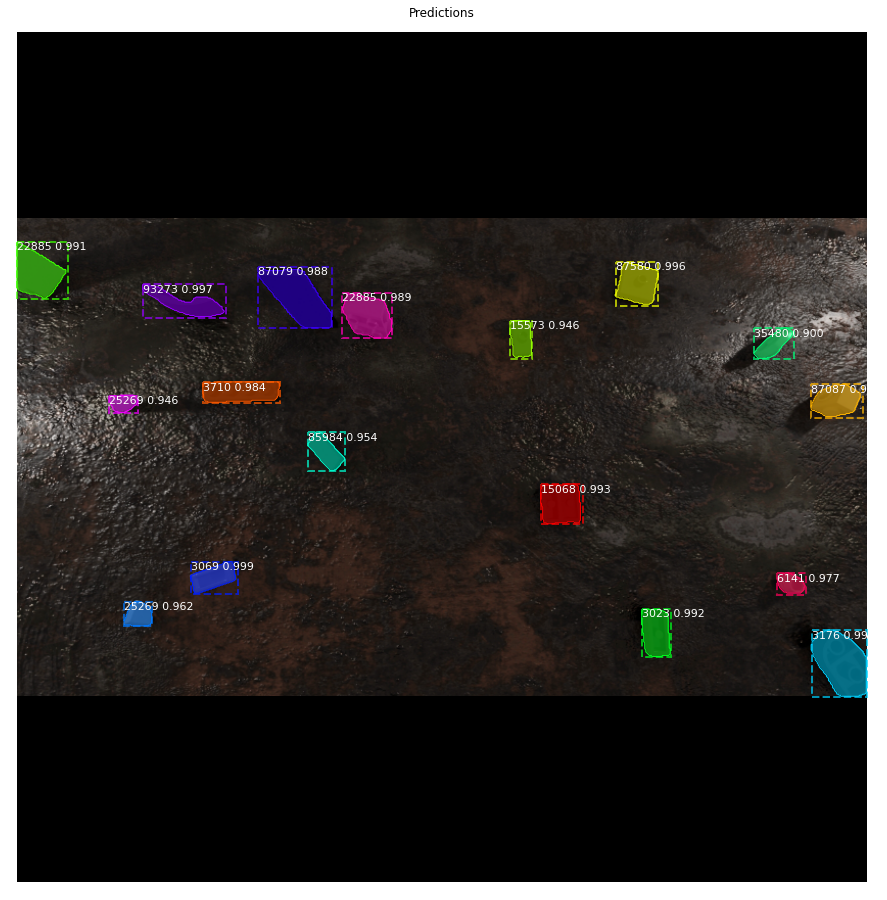

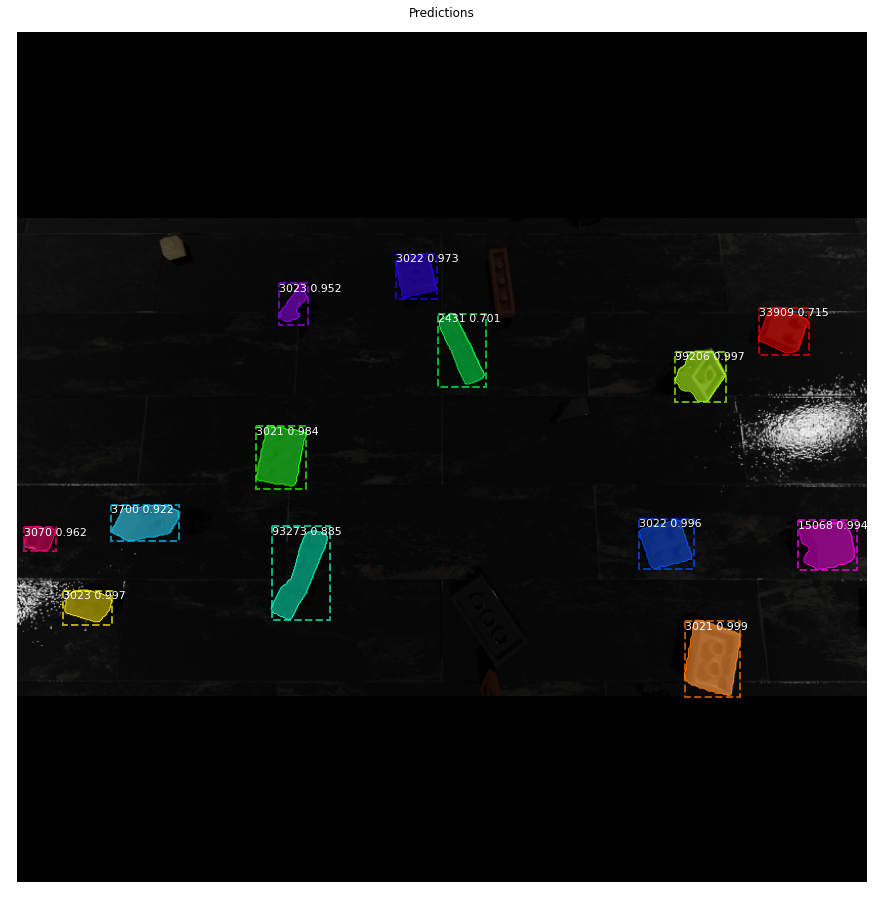

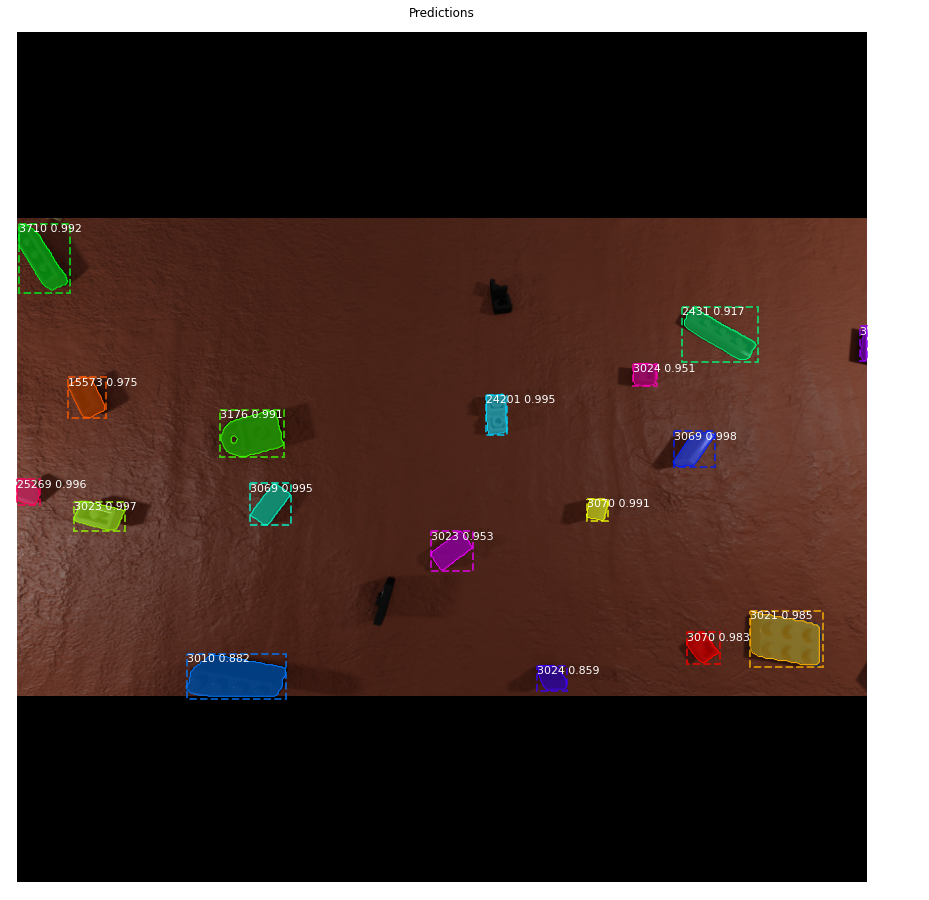

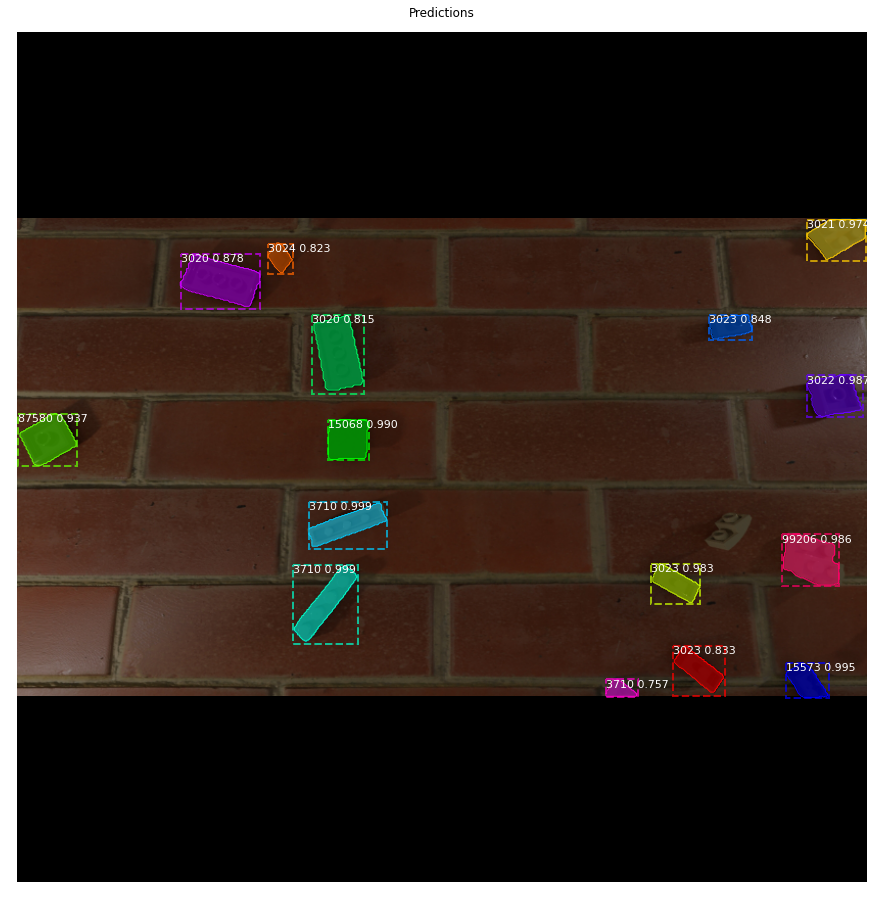

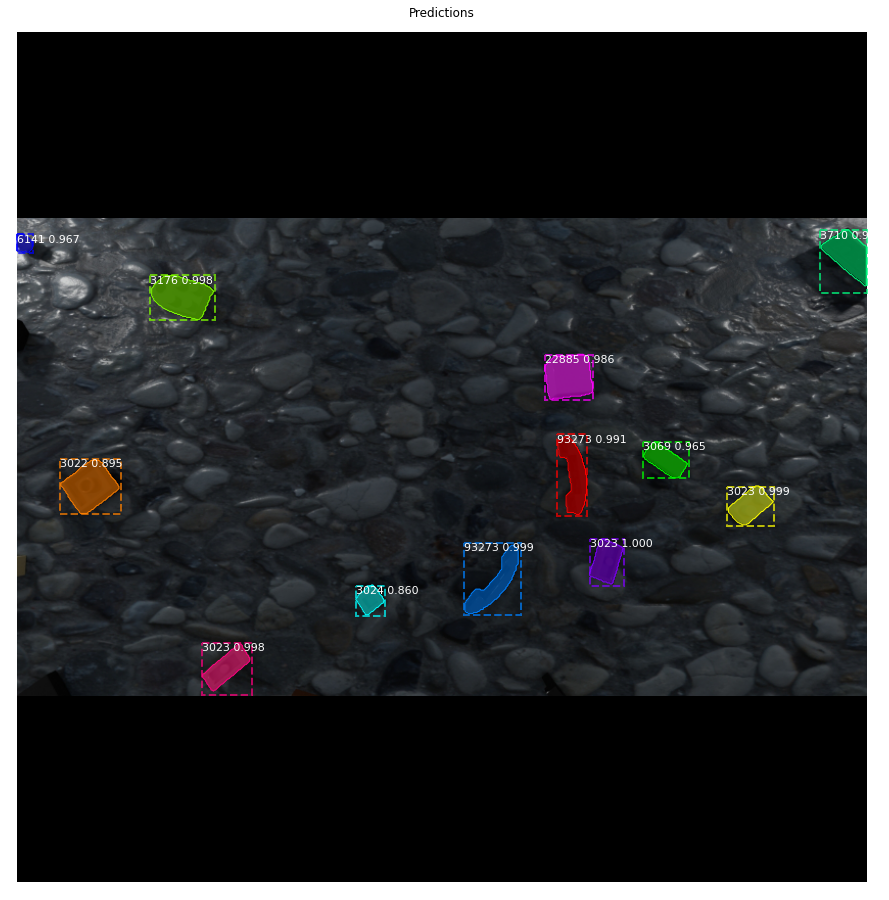

In [13]:
# Compute VOC-Style mAP @ IoU=0.5
APs = []
TPs = []
FPs = []
total_instances = 0

# IoU threshold to determine a postive match
mAP_IOU_THRESHOLD = 0.2

if DATASET == "eval":
    image_ids = dataset.image_ids
else:
    image_ids = np.random.choice(dataset.image_ids, 5 if config.USE_STAGE_TWO else 1)


precisions_dict = {}
recall_dict     = {}
for image_id in image_ids:

    # Load image and ground truth data
    image, image_meta, gt_class_ids, gt_bboxes, gt_masks =  modellib.load_image_gt(dataset, config, image_id)#, use_mini_mask=False)

    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]

    ax = get_ax(1)
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset.class_names, 
                                r['scores'], ax=ax, title="Predictions")
#     plt.savefig(f'output_{image_id}.png')

    # Compute AP    
    AP, precisions, recalls, overlaps = utils.compute_ap(gt_bboxes, gt_class_ids, gt_masks,    
                                                         r["rois"], r["class_ids"], r["scores"], r['masks'],
                                                         iou_threshold=mAP_IOU_THRESHOLD)
    tp, fp, fn = calc_conditions(gt_bboxes, r["rois"], mAP_IOU_THRESHOLD)
    
    precisions_dict[image_id] = np.mean(precisions)
    recall_dict[image_id] = np.mean(recalls)
    
    APs.append(AP)
    TPs.append(tp)
    FPs.append(fp)
    
    total_instances += len(gt_bboxes)

tps = int(np.sum(TPs))
fps = int(np.sum(FPs))

print(f'TP: {tps}, FP: {fps}, TP/FP: {0 if fps == 0 else (tps/fps)}, TP/Total: {0 if total_instances == 0 else (100./total_instances)*tps}')
print("mAP@" + str(mAP_IOU_THRESHOLD)+ ": ", np.mean(APs))

# Export Model
- https://www.tensorflow.org/tutorials/keras/save_and_load#saving_custom_objects

In [14]:
keras_model = model.keras_model
# keras_model.save('exported_models/brxilated_model.h5')
keras_model.save('exported_models/brixilated')

print(keras_model.summary())

2021-10-22 23:42:00.624689: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-10-22 23:42:00.625177: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2021-10-22 23:42:00.625207: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-10-22 23:42:00.625212: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2021-10-22 23:42:00.625217: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2021-10-22 23:42:00.625900: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 8695 MB memory) -> physical GPU (device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:41:00.0, compu

INFO:tensorflow:Assets written to: exported_models/brixilated/assets
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
_____________________